# Training of ML Model

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
import sklearn as sk
import joblib
import hashlib

## Read CSV file as a pandas dataframe

In [2]:
dataframe = pd.read_csv('CICFlowMeter_out.csv')
dataframe.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,175.45.176.2-149.171.126.16-23357-80-6,175.45.176.2,23357,149.171.126.16,80,6,22/01/2015 07:50:15 AM,214392,9,21,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Exploits
1,175.45.176.0-149.171.126.16-13284-80-6,175.45.176.0,13284,149.171.126.16,80,6,22/01/2015 07:50:13 AM,2376792,9,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Reconnaissance
2,175.45.176.2-149.171.126.16-13792-5555-6,175.45.176.2,13792,149.171.126.16,5555,6,22/01/2015 07:50:16 AM,131350,10,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Exploits
3,175.45.176.0-149.171.126.15-39500-80-6,175.45.176.0,39500,149.171.126.15,80,6,22/01/2015 07:50:18 AM,164796,6,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS
4,175.45.176.0-149.171.126.14-29309-3000-6,175.45.176.0,29309,149.171.126.14,3000,6,22/01/2015 07:50:19 AM,163418,6,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Generic


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540241 entries, 0 to 3540240
Data columns (total 84 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Flow ID                     object 
 1   Src IP                      object 
 2   Src Port                    int64  
 3   Dst IP                      object 
 4   Dst Port                    int64  
 5   Protocol                    int64  
 6   Timestamp                   object 
 7   Flow Duration               int64  
 8   Total Fwd Packet            int64  
 9   Total Bwd packets           int64  
 10  Total Length of Fwd Packet  float64
 11  Total Length of Bwd Packet  float64
 12  Fwd Packet Length Max       float64
 13  Fwd Packet Length Min       float64
 14  Fwd Packet Length Mean      float64
 15  Fwd Packet Length Std       float64
 16  Bwd Packet Length Max       float64
 17  Bwd Packet Length Min       float64
 18  Bwd Packet Length Mean      float64
 19  Bwd Packet Length Std

## Check amount of unique values for each column
100% means all of the values are unique while 0% means that all of the values are the same.

In [4]:
ENCODING = 'utf-8'

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v, round(100*(s[v]/t), 2)))
    return "[{}]".format(", ".join(result))

def analyze(filename):
    print()
    print("Analyzing: {}".format(filename))
    dataframe = pd.read_csv(filename, encoding=ENCODING)
    cols = dataframe.columns.values
    total = float(len(dataframe))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = dataframe[col].unique()
        unique_count = len(uniques)
        if unique_count > 100:
            print("** {}:{} ({}%)".format(col, unique_count, int(((unique_count/total)*100))))
        else:
            print("** {}:{}".format(col, expand_categories(dataframe[col])))
            expand_categories(dataframe[col])

analyze('CICFlowMeter_out.csv')
dataframe.describe()


Analyzing: CICFlowMeter_out.csv
3540241 rows
** Flow ID:2163883 (61%)
** Src IP:[59.166.0.1:9.28%, 59.166.0.4:9.28%, 59.166.0.0:9.27%, 59.166.0.2:9.27%, 59.166.0.5:9.26%, 59.166.0.3:9.2%, 59.166.0.9:8.92%, 59.166.0.8:8.88%, 59.166.0.6:8.88%, 59.166.0.7:8.87%, 175.45.176.3:1.1%, 175.45.176.1:1.04%, 175.45.176.0:1.0%, 175.45.176.2:0.98%, 149.171.126.0:0.36%, 149.171.126.3:0.36%, 149.171.126.4:0.36%, 149.171.126.2:0.36%, 149.171.126.5:0.36%, 149.171.126.1:0.36%, 149.171.126.9:0.35%, 149.171.126.7:0.35%, 149.171.126.8:0.35%, 149.171.126.6:0.34%, 149.171.126.11:0.15%, 149.171.126.14:0.13%, 149.171.126.19:0.13%, 149.171.126.10:0.12%, 149.171.126.15:0.12%, 149.171.126.18:0.12%, 149.171.126.16:0.11%, 149.171.126.12:0.11%, 149.171.126.13:0.11%, 149.171.126.17:0.11%, 10.40.85.10:0.01%, 10.40.182.6:0.0%, 192.168.241.243:0.0%, 10.40.182.1:0.0%, 10.40.85.1:0.0%, 127.0.0.1:0.0%]
** Src Port:64646 (1%)
** Dst IP:[149.171.126.4:9.27%, 149.171.126.3:9.27%, 149.171.126.1:9.27%, 149.171.126.2:9.27%, 149

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,3.540241e+06,3.540241e+06,3.540241e+06,3.540241e+06,3.540241e+06,3.540241e+06,3.540241e+06,3.540241e+06,3.540241e+06,3.540241e+06,...,3.540241e+06,3.540241e+06,3.540241e+06,3.540241e+06,3.540241e+06,3.540241e+06,3.540241e+06,3.540241e+06,3.540241e+06,3.540241e+06
mean,3.187573e+04,1.641632e+04,7.759312e+00,3.487602e+05,2.266156e+01,2.938711e+01,1.878354e+03,2.342127e+04,1.500797e+02,1.094084e+01,...,6.794456e+00,2.759795e+01,9.482037e+03,2.792051e+03,1.286217e+04,7.603646e+03,4.695143e+04,1.825652e+03,4.866172e+04,4.552857e+04
std,1.948902e+04,2.038958e+04,4.032029e+00,2.748282e+06,6.852967e+01,1.010743e+02,5.530137e+04,1.282813e+05,3.216338e+02,3.996782e+01,...,4.482890e+01,8.915630e+00,3.810417e+05,2.550465e+05,5.837946e+05,3.273663e+05,1.289154e+06,1.115097e+05,1.309870e+06,1.278377e+06
min,1.000000e+01,1.000000e+01,6.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.472900e+04,8.000000e+01,6.000000e+00,3.430000e+02,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.178900e+04,6.434000e+03,6.000000e+00,1.229000e+03,2.000000e+00,2.000000e+00,9.000000e+01,1.220000e+02,4.500000e+01,0.000000e+00,...,1.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.884600e+04,3.090600e+04,6.000000e+00,5.235100e+04,2.200000e+01,2.300000e+01,4.740000e+02,4.986000e+03,1.140000e+02,0.000000e+00,...,1.200000e+01,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,6.553500e+04,1.700000e+01,1.199995e+08,2.003800e+04,1.102100e+04,2.605270e+07,1.421599e+07,1.476000e+03,1.472000e+03,...,2.003200e+04,4.000000e+01,1.109349e+08,7.417760e+07,1.109349e+08,1.109349e+08,1.198828e+08,7.214360e+07,1.198828e+08,1.198828e+08


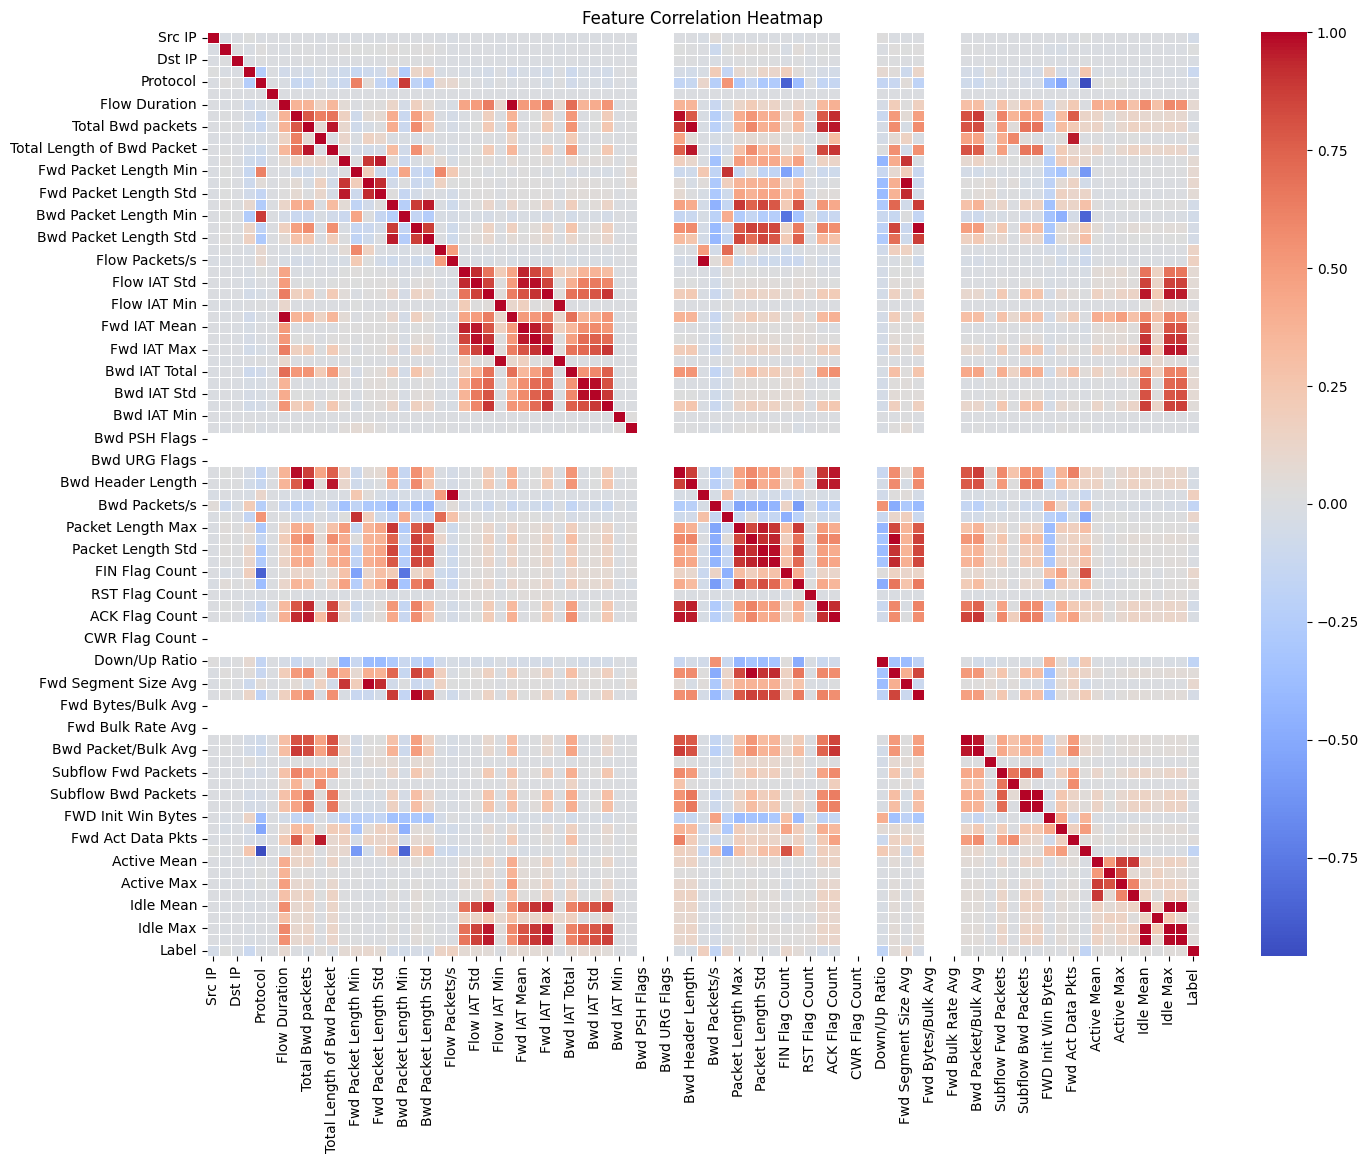

In [5]:
dataframe.columns = dataframe.columns.str.strip()
dataframe.fillna(0)
dataframe.drop('Flow ID', axis=1, inplace=True)
dataframe['Label'] = dataframe['Label'].map(lambda x: 0 if x == 'Benign' else 1)


def hash(x, max_value=1000):
    return int(hashlib.md5(x.encode()).hexdigest(), 16) % max_value

dataframe['Src IP'] = dataframe['Src IP'].map(lambda x: hash(str(x)))
dataframe['Dst IP'] = dataframe['Dst IP'].map(lambda x: hash(str(x)))
dataframe['Timestamp'] = dataframe['Timestamp'].map(lambda x: hash(str(x)))
dataframe_numeric = dataframe.select_dtypes(include=['number'])
corr_matrix = dataframe_numeric.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

## Data Cleaning

### Identifying duplicates

In [6]:
# corr_matrix = dataframe_numeric.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# threshold = 0.9
# to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
# dataframe = dataframe.drop(columns=to_drop, axis=1)

dups = dataframe[dataframe.duplicated()]
print(f'Number of duplicates: {len(dups)}')

dataframe.drop_duplicates(inplace=True)
print(dataframe.shape)

dataframe['Label'].value_counts()

#dataframe.info()

Number of duplicates: 59906
(3480335, 83)


Label
0    3390752
1      89583
Name: count, dtype: int64

## Incorporate sampling because of the class imbalance of "Label"

In [7]:
benign_data = dataframe[dataframe['Label'] == 0]
attack_data = dataframe[dataframe['Label'] == 1]

benign_undersampled = sk.utils.resample(benign_data, replace=False, n_samples=len(attack_data), random_state=42)
dataframe = pd.concat([benign_undersampled, attack_data])

#attack_oversampled = sk.utils.resample(attack_data, replace=True, n_samples=len(benign_data), random_state=42)
#dataframe = pd.concat([benign_data, attack_oversampled])

## Splitting the training and testing data

In [8]:
y = dataframe['Label']
dataframe.drop('Label', axis=1, inplace=True)

x = dataframe

x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train.replace([np.inf, -np.inf], 0, inplace=True)
x_test.replace([np.inf, -np.inf], 0, inplace=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143332, 82) (35834, 82) (143332,) (35834,)


## Scaling numerical features

In [9]:
scaler = sk.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Build MLP Model
An Multi Layer Perceptron

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(82, activation='relu', input_shape=(82,), kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(52, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(22, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Train the model

In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1, shuffle=True, callbacks=[early_stop])

Epoch 1/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9042 - loss: 0.3693 - val_accuracy: 0.9875 - val_loss: 0.1347
Epoch 2/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9854 - loss: 0.1402 - val_accuracy: 0.9881 - val_loss: 0.1058
Epoch 3/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9864 - loss: 0.1096 - val_accuracy: 0.9891 - val_loss: 0.0870
Epoch 4/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9875 - loss: 0.0906 - val_accuracy: 0.9893 - val_loss: 0.0755
Epoch 5/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9881 - loss: 0.0780 - val_accuracy: 0.9894 - val_loss: 0.0685
Epoch 6/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9887 - loss: 0.0695 - val_accuracy: 0.9898 - val_loss: 0.0629
Epoch 7/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9886 - loss: 0.0668 - val_accuracy: 0.9897 - val_loss: 0.0604
Epoch 8/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9887 - loss: 0.0639 - val_accuracy: 0.

## Model Evaluation

In [12]:
y_pred_prob = model.predict(x_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(sk.metrics.classification_report(y_test, y_pred, target_names=['Benign', 'Attack']))
print("\nConfusion Matrix:")
print(sk.metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy:", sk.metrics.accuracy_score(y_test, y_pred))
print("\nPrecision:", sk.metrics.precision_score(y_test, y_pred))
print("\nRecall:", sk.metrics.recall_score(y_test, y_pred))
print("\nF1 Score:", sk.metrics.f1_score(y_test, y_pred))


1120/1120 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.98      0.99     17917
      Attack       0.98      1.00      0.99     17917

    accuracy                           0.99     35834
   macro avg       0.99      0.99      0.99     35834
weighted avg       0.99      0.99      0.99     35834


Confusion Matrix:
[[17571   346]
 [   37 17880]]

Accuracy: 0.9893118267567115

Precision: 0.9810161308021508

Recall: 0.9979349221409834

F1 Score: 0.9894032039399053


## Plot graphs

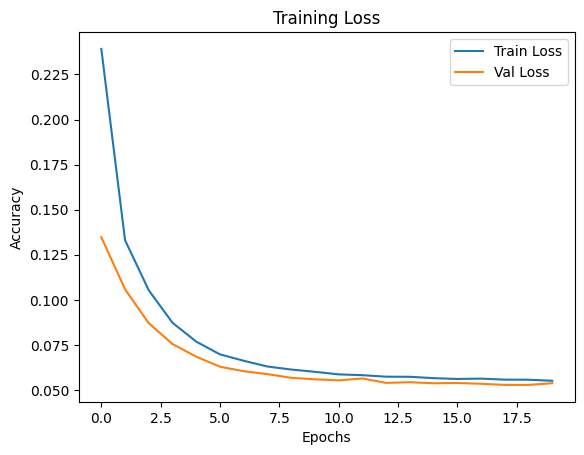

In [13]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

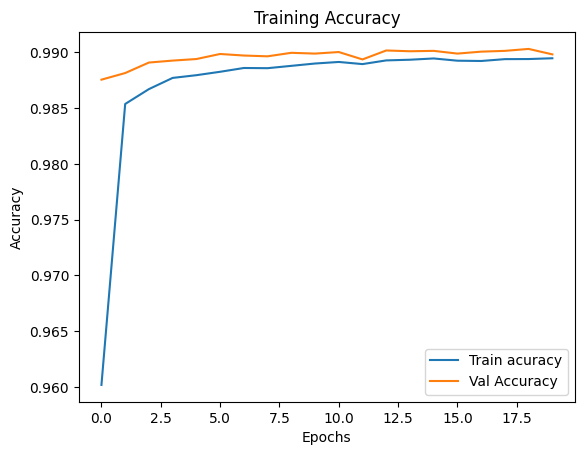

In [14]:
plt.plot(history.history['accuracy'], label='Train acuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

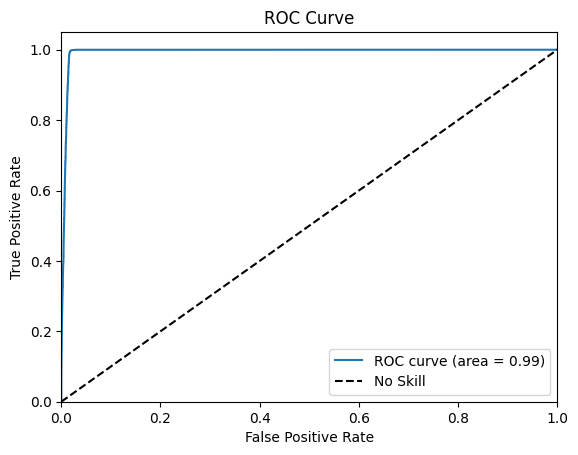

In [15]:
fpr, tpr, thresholds = sk.metrics.roc_curve(y_test, y_pred_prob)
roc_auc = sk.metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Save Model

In [16]:
model.evaluate(x_test, y_test, verbose=1)

1120/1120 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9893 - loss: 0.0564


[0.055868763476610184, 0.9893118143081665]

In [17]:
model.save('MLP_IDS.keras')
joblib.dump(model, 'MLP_IDS.pkl')


['MLP_IDS.pkl']